In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

# Загрузка изображения
img = cv2.imread('./face.jpg')

# Копирование изображения
img2 = img.copy()

# Загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# Выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

Распознование лица прямоугольником

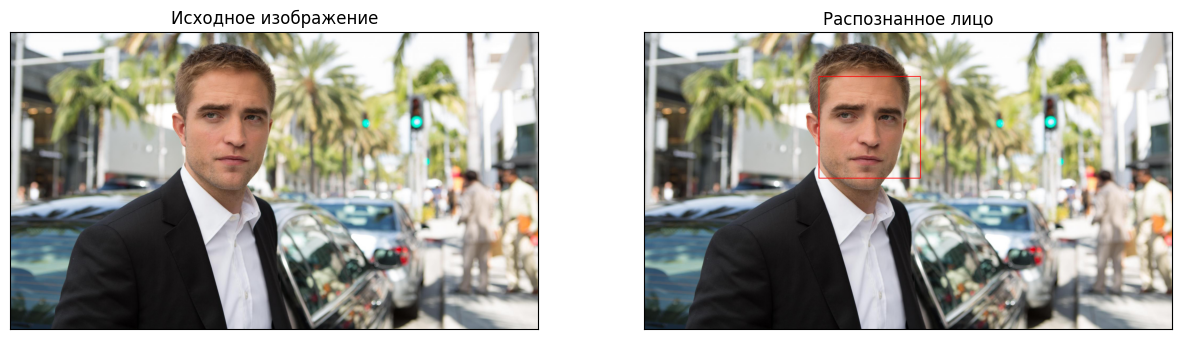

In [ ]:
# Формирование прямоугольника вокруг обнаруженного лица
for box in bboxes:
    # Формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # Рисование прямоугольников
    cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лицо')

pyplot.show()

Выделение распознанного лица овалом

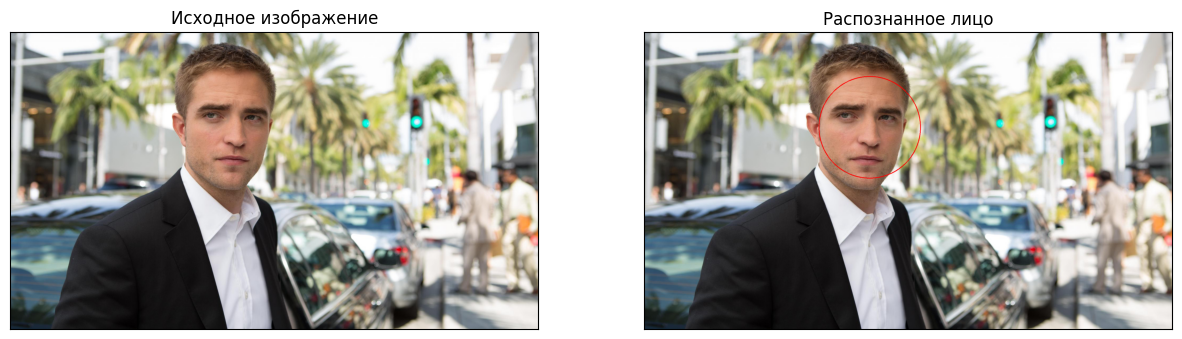

In [ ]:
# Копирование изображения
img3 = img.copy()

# Формирование овала вокруг обнаруженного лица
for box in bboxes:
    # Формирование координат
    x, y, width, height = box

    # Формирование координат центра
    x_center = x + width // 2
    y_center = y + height // 2
    center_coordinates = (x_center, y_center)

    # Формирование большой и малой осей элипса
    x2 = width // 2
    y2 = height // 2
    axes_length = (x2, y2)

    # Рисование овала
    cv2.ellipse (img3, center_coordinates, axes_length, 0, 0, 360, (0, 0, 255), 2)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лицо')

pyplot.show()

Выделение распознанного лица и глаз

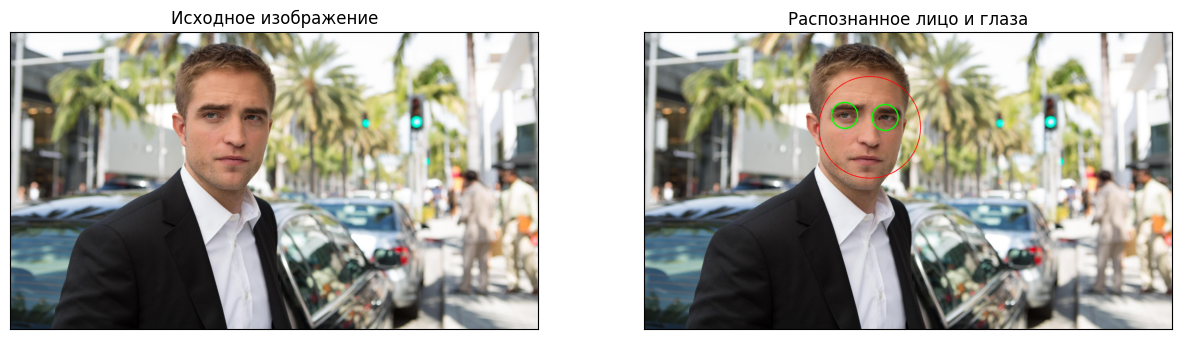

In [ ]:
# Копирование изображения
img4 = img.copy()

# Загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# Загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# Формирование овала вокруг обнаруженного лица
for box in bboxes:
    # Формирование координат
    x, y, width, height = box

    # Формирование координат центра
    x_center = x + width // 2
    y_center = y + height // 2
    center_coordinates = (x_center, y_center)

    # Формирование большой и малой осей элипса
    x2 = width // 2
    y2 = height // 2
    axes_length = (x2, y2)

    # Рисование овала
    cv2.ellipse (img4, center_coordinates, axes_length, 0, 0, 360, (0, 0, 255), 2)

    face = img4[y:y + height, x:x + width] # найденная область с лицом

    # Выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        # Определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # Вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # зеленый цвет
        thickness = 3 # толщина линии
        # Рисуем круг
        cv2.circle(face, center, radius, color, thickness)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лицо и глаза')

pyplot.show()

Очки

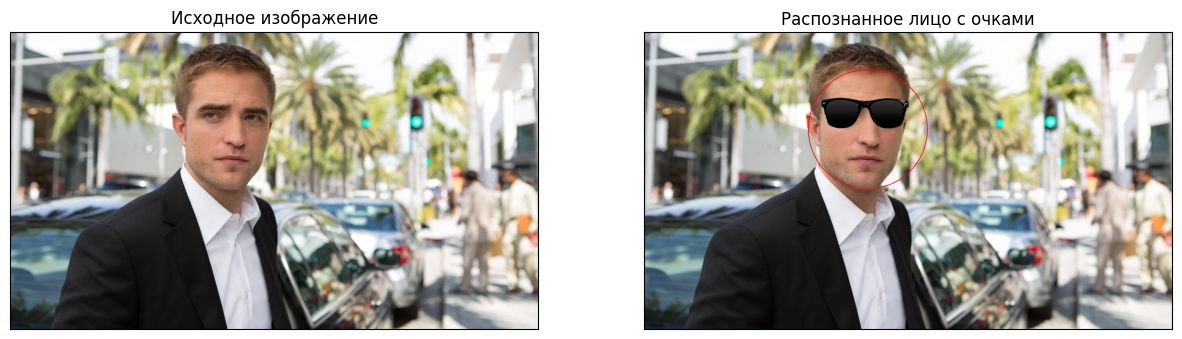

In [ ]:
# Копирование изображения
img5 = img.copy()

# Загрузка очков с альфа-каналом
glasses = cv2.imread('sunglasses.png', -1)

# Увеличьте размер очков (например, в 1.5 раза)
scale_factor = 1.5
glasses_width = int(glasses.shape[1] * scale_factor)
glasses_height = int(glasses.shape[0] * scale_factor)
glasses_resized = cv2.resize(glasses, (glasses_width, glasses_height), interpolation=cv2.INTER_AREA)

# Определите положение для очков
x_offset = 100  # координата X
y_offset = 100  # координата Y

# Получите размеры увеличенных очков
glasses_height, glasses_width = glasses_resized.shape[:2]

# Преобразование изображения в оттенки серого
gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

# Обнаружение лиц
faces = classifier_face.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    # Формирование координат центра
    x_center = x + w // 2
    y_center = y + h // 2
    center_coordinates = (x_center, y_center)

    # Формирование большой и малой осей элипса
    x2 = w // 2
    y2 = h // 2
    axes_length = (x2, y2)

    # Рисование овала
    cv2.ellipse (img5, center_coordinates, axes_length, 0, 0, 360, (0, 0, 255), 2)

    # Обнаружение глаз в области лица
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img5[y:y+h, x:x+w]
    eyes = classifier_eye.detectMultiScale(roi_gray)

    if len(eyes) >= 2:
        # Получаем координаты глаз
        eye1 = eyes[0]
        eye2 = eyes[1]

        # Определяем положение и размер очков
        glasses_width = eye2[0] + eye2[2]
        glasses_height = int(glasses_width * glasses.shape[0] / glasses.shape[1])

        glasses_resized = cv2.resize(glasses, (glasses_width, glasses_height))

        # Определяем позицию для наложения очков
        glasses_x = eye1[0] // 2 + x
        glasses_y = int((eye1[1] + eye2[1]) / 2) + y - glasses_height // 4

        # Наложение очков на изображение
        for c in range(0, 3):
            img5[glasses_y:glasses_y + glasses_height, glasses_x:glasses_x + glasses_width, c] = \
                glasses_resized[:, :, c] * (glasses_resized[:, :, 3] / 255.0) + \
                img5[glasses_y:glasses_y + glasses_height, glasses_x:glasses_x + glasses_width, c] * (1.0 - glasses_resized[:, :, 3] / 255.0)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лицо с очками')

pyplot.show()

Блюр

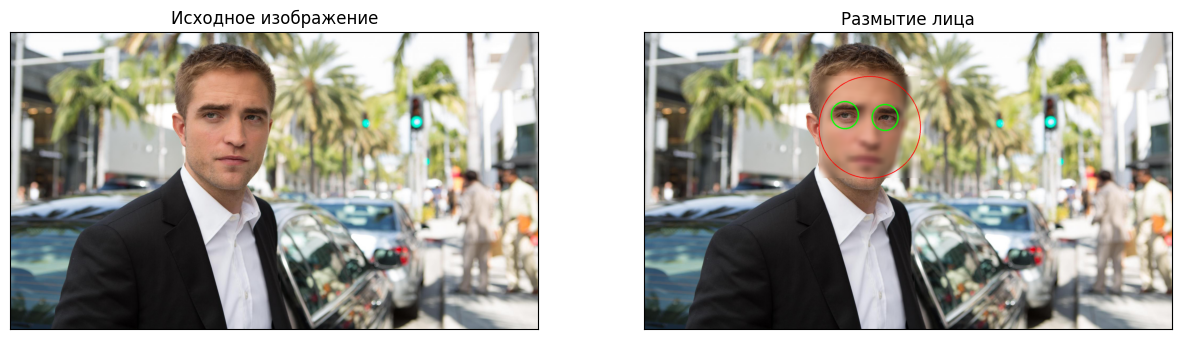

In [ ]:
# Копирование изображения
img6 = img.copy()

# Формирование овала вокруг обнаруженного лица
for box in bboxes:
    # Формирование координат
    x, y, width, height = box

    # Формирование координат центра
    x_center = x + width // 2
    y_center = y + height // 2
    center_coordinates = (x_center, y_center)

    # Формирование большой и малой осей элипса
    x2 = width // 2
    y2 = height // 2
    axes_length = (x2, y2)

    face = img6[y:y + height, x:x + width] # найденная область с лицом

    # Выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    # Создание маски для глаз
    mask = np.zeros(face.shape[:2], dtype=np.uint8)

    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        # Определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # Вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # зеленый цвет
        thickness = 3 # толщина линии
        # Рисуем белые прямоугольники на маске
        cv2.rectangle(mask, (x_eye, y_eye), (x_eye + w_eye, y_eye + h_eye), 255, -1)

    # Размытие всего лица
    blurred_face = cv2.GaussianBlur(face, (25, 25), 30)

    # Применяем маску: берем размазанное лицо, где маска равна 0, и оригинальное лицо, где маска равна 255
    face_masked = np.where(mask[:, :, np.newaxis] == 255, face, blurred_face)

    # Замена размытого лица в основном изображении
    img6[y:y + height, x:x + width] = face_masked

    # Рисование овала
    cv2.ellipse (img6, center_coordinates, axes_length, 0, 0, 360, (0, 0, 255), 2)

    for (x_eye,y_eye,w_eye,h_eye) in eyes:
        # Определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))
        radius = int(0.3 * (w_eye + h_eye))
        cv2.circle(face, center, radius, color, thickness)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Размытие лица')

pyplot.show()

Попробуем выполнить распознование на изображении с большим кол-вом лиц

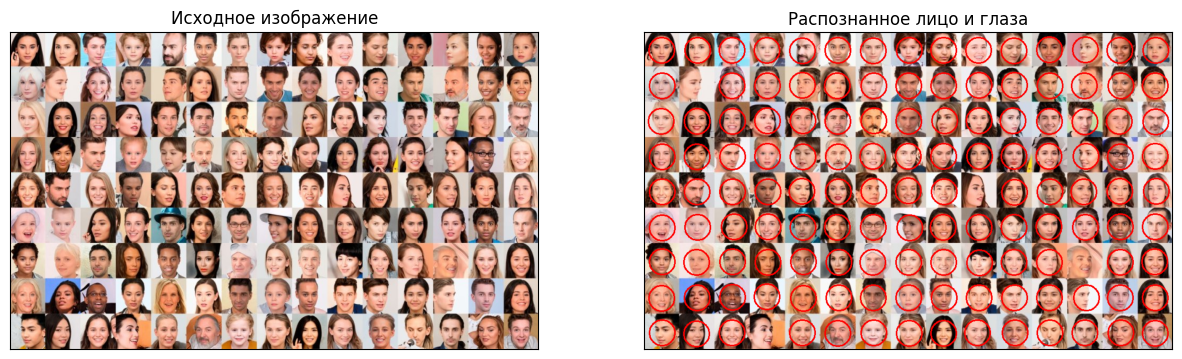

In [ ]:
# Загрузка изображения
image = cv2.imread('./faces.jpg')

# Копирование изображения
img7 = image.copy()

# Загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# Загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# Выполнение распознавания лиц
bboxes = classifier_face.detectMultiScale(image, scaleFactor=2, minNeighbors=3, minSize=(10, 10))

# Формирование овала вокруг обнаруженного лица
for box in bboxes:
    # Формирование координат
    x, y, width, height = box

    # Формирование координат центра
    x_center = x + width // 2
    y_center = y + height // 2
    center_coordinates = (x_center, y_center)

    # Формирование большой и малой осей элипса
    x2 = width // 2
    y2 = height // 2
    axes_length = (x2, y2)

    # Рисование овала
    cv2.ellipse (img7, center_coordinates, axes_length, 0, 0, 360, (0, 0, 255), 2)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img7, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лицо и глаза')

pyplot.show()

Из 135 объектов пропущено только 2, что неплохо.